login success!
logout success!


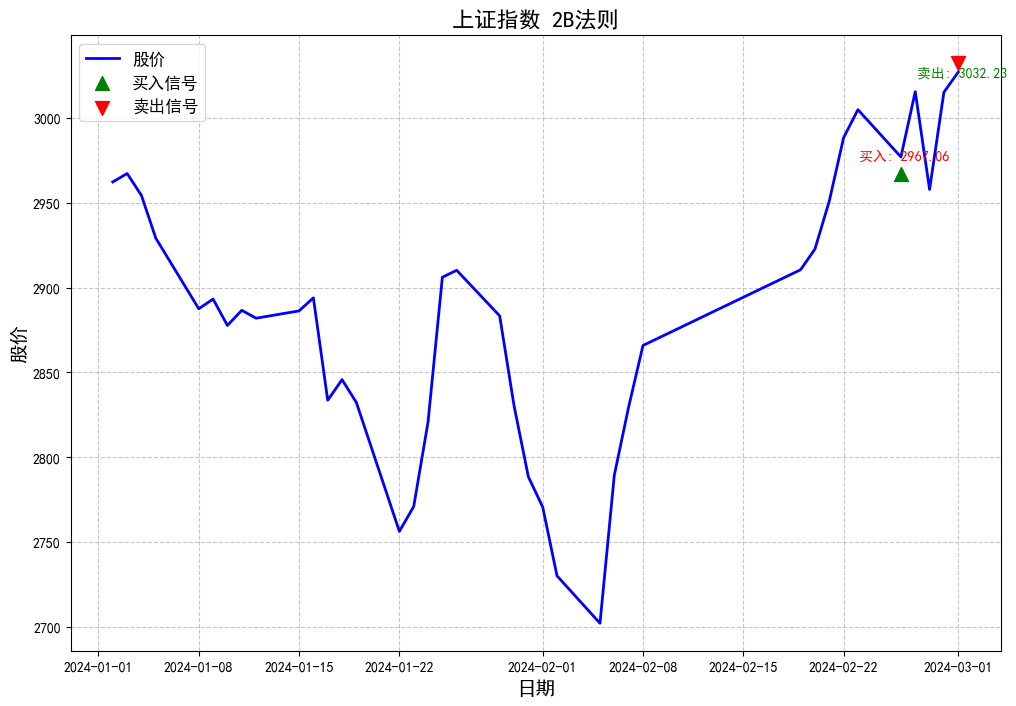

In [3]:
import baostock as bs
import pandas as pd
import matplotlib.pyplot as plt

# 登录baostock系统
lg = bs.login()

# 设置股票代码和时间范围
stock_code = "sh.000001"  # 上证指数
start_date = "2024-01-01"
end_date = "2024-12-31"

# 获取股票数据
rs = bs.query_history_k_data(stock_code,
                              "date,open,high,low,close",
                              start_date=start_date,
                              end_date=end_date,
                              frequency="d",
                              adjustflag="3")  # adjustflag="3"表示不复权
data = rs.get_data()

# 登出baostock系统
bs.logout()

# 创建DataFrame
df = data[['date', 'open', 'high', 'low', 'close']].rename(columns={'date': 'Date'})

# 转换日期格式
df['Date'] = pd.to_datetime(df['Date'])

# 将股价数据转换为数值类型
df[['open', 'high', 'low', 'close']] = df[['open', 'high', 'low', 'close']].astype(float)

# 计算2B法则的信号
df['Signal'] = 0  # 默认无信号
df.loc[(df['low'] < df['low'].shift(1)) & (df['low'].shift(1) > df['low'].shift(2)), 'Signal'] = 1  # 买入信号
df.loc[(df['high'] > df['high'].shift(1)) & (df['high'].shift(1) < df['high'].shift(2)), 'Signal'] = -1  # 卖出信号

# 创建一个美化的图表
plt.figure(figsize=(12, 8))

# 支撑中文
plt.rcParams['font.family']='SimHei'
plt.rcParams['axes.unicode_minus']=False


# 绘制股价曲线
plt.plot(df['Date'], df['close'], label='股价', linewidth=2, color='blue')

# 标记最近的买卖信号
last_buy_signal = df[df['Signal'] == 1].tail(1)
last_sell_signal = df[df['Signal'] == -1].tail(1)
plt.scatter(last_buy_signal['Date'], last_buy_signal['low'], marker='^', color='g', label='买入信号', s=100, zorder=5)
plt.scatter(last_sell_signal['Date'], last_sell_signal['high'], marker='v', color='r', label='卖出信号', s=100, zorder=5)

# 添加网格
plt.grid(True, linestyle='--', alpha=0.7)

# 设置图表标题和标签
plt.title(f'上证指数 2B法则', fontsize=16)
plt.xlabel('日期', fontsize=14)
plt.ylabel('股价', fontsize=14)

# 调整x轴日期标签的格式
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))

# 添加买卖点的注释
plt.annotate(f' 买入: {last_buy_signal["low"].values[0]:.2f}', (last_buy_signal['Date'].values[0], last_buy_signal['low'].values[0]),
             textcoords="offset points", xytext=(0, 10), ha='center', fontsize=10, color='r', zorder=10)

plt.annotate(f' 卖出: {last_sell_signal["high"].values[0]:.2f}', (last_sell_signal['Date'].values[0], last_sell_signal['high'].values[0]),
             textcoords="offset points", xytext=(0, -10), ha='center', fontsize=10, color='g', zorder=10)

# 显示图例
plt.legend(fontsize=12)

# 显示图表
plt.show()
